In [1]:
import networkx as nx
import numpy as np
import string
import matplotlib.pyplot as plt
import osmnx as ox
import pandas as pd
import pickle

from panchamy.cut_graph_to_boundaries import cut_graph

In [2]:
import os
os.getcwd()

'C:\\Users\\isvandroffelaa\\Documents\\model\\coarsening\\consolidate_nodes'

In [3]:
city='Manhattan'

In [4]:
filepath=f"../data/networks/{city}.graph.graphml"
# ox.save_graph_geopackage(G, filepath=filepath)
G = ox.load_graphml(filepath=filepath)

with open(f'../data/networks/escape_nodes_{city}.pkl', 'rb') as f:
    escape_nodes_ = pickle.load(f)
    
with open(f'../data/networks/fugitive_start_{city}.pkl', 'rb') as f:
    fugitive_start = pickle.load(f)
    
with open(f'../data/networks/start_police_{city}.pkl', 'rb') as f:
    police_start = pickle.load(f)

escape_nodes = []
for node in escape_nodes_:
    if node in G.nodes():
        if nx.has_path(G, source=fugitive_start, target=node):
            escape_nodes.append(node)


G.graph['crs'] = 4326

In [5]:
def node_colors(G, escape_nodes, fugitive_start, police_start):
    node_size = []
    node_color = []
    for u, data in G.nodes(data=True):
        if data['osmid_original'] == fugitive_start:
            node_size.append(40)
            node_color.append('tab:orange')
        # elif len(set(police_start).intersection(set(data['osmid_original']))) > 0:
        #     node_size.append(40)
        #     node_color.append('tab:blue')
        #     print('pol node')
        elif data['osmid_original'] in escape_nodes:
            node_size.append(40)
            node_color.append('tab:red')
        else:
            node_size.append(5)
            # node_size.append(data['street_count']*5)
            node_color.append('lightgray')
        # except TypeError:
        #     if len(set(police_start).intersection(set([data['osmid_original']]))) > 0:
        #         node_size.append(40)
        #         node_color.append('tab:blue')
        #         print('pol node')
        #     elif data['osmid_original'] == fugitive_start:
        #         node_size.append(40)
        #         node_color.append('tab:orange')
        #     elif data['osmid_original'] in escape_nodes:
        #         node_size.append(40)
        #         node_color.append('tab:red')
        #     else:
        #         node_size.append(5)
        #         # node_size.append(data['street_count']*5)
        #         node_color.append('lightgray')
        # elif data['osmid_original'] in police_start:
        #     node_size.append(40)
        #     node_color.append('tab:blue')

    
    return node_size, node_color


In [6]:
G_con = ox.project_graph(G)

In [7]:
# attrs = nx.get_node_attributes(G_con, 'street_count')
# attrs
# 
# import seaborn as sns
# sns.histplot(attrs.values())

In [42]:
tolerance = 50

G_pruned = ox.simplification.consolidate_intersections(G_con, tolerance=tolerance, rebuild_graph=True, dead_ends=False)
len(G_pruned.nodes())

159

In [43]:
# attrs = nx.get_node_attributes(G_pruned, 'street_count')
attrs = nx.get_edge_attributes(G_pruned, 'highway')
attrs
# sns.histplot(attrs.values())

{(0, 1, 0): 'tertiary',
 (0, 2, 0): 'tertiary',
 (1, 0, 0): 'tertiary',
 (1, 3, 0): 'residential',
 (1, 2, 0): 'residential',
 (1, 2, 1): 'residential',
 (1, 2, 2): 'residential',
 (1, 2, 3): 'residential',
 (1, 26, 0): 'primary',
 (1, 68, 0): 'residential',
 (1, 121, 0): 'primary',
 (1, 102, 0): 'residential',
 (1, 102, 1): 'residential',
 (2, 0, 0): 'tertiary',
 (2, 4, 0): 'residential',
 (2, 4, 1): 'secondary',
 (2, 4, 2): 'residential',
 (2, 4, 3): 'residential',
 (2, 4, 4): 'residential',
 (2, 4, 5): 'residential',
 (2, 4, 6): 'residential',
 (2, 4, 7): 'secondary',
 (2, 4, 8): 'primary',
 (2, 4, 9): 'tertiary',
 (2, 4, 10): 'residential',
 (2, 4, 11): 'residential',
 (2, 4, 12): 'residential',
 (2, 4, 13): 'secondary',
 (2, 4, 14): 'residential',
 (2, 4, 15): 'residential',
 (2, 4, 16): 'primary',
 (2, 4, 17): 'residential',
 (2, 4, 18): 'secondary',
 (2, 4, 19): 'residential',
 (2, 4, 20): 'secondary',
 (2, 4, 21): 'residential',
 (2, 4, 22): 'residential',
 (2, 4, 23): 'residen

In [44]:
if city == 'Amsterdam':
    from shapely import LineString
    for u, v, data in G_pruned.edges(data=True):
        if type((data['geometry'])) != LineString:
            try:
                data['geometry'] = data['geometry'][data['u_original'], data['v_original'], 0]
                nx.set_edge_attributes(G_pruned, {(u, v, 0): data})
            except:
                del data['geometry']
                print(data)
                nx.set_edge_attributes(G_pruned, data)

    for u, v, data in G_pruned.edges(data=True):
        if type((data['geometry'])) != LineString:
            del data['geometry']
            print(data)
            nx.set_edge_attributes(G_pruned, {(u, v, 0): data})

In [45]:
def edge_colors(G):
    # edge_color = ['lightgray'] * len(G.edges())
    edge_color = []
    greys = []
    edge_size = [1] * len(G.edges())
    for u, v, data in G.edges(data=True):
        # if data['highway'] == 'motorway':
        #     edge_color.append('tab:red')
        # elif data['highway'] == 'motorway_link':
        #     edge_color.append('tab:red')
        # elif data['highway'] == 'trunk':
        #     edge_color.append('tab:orange')
        # elif data['highway'] == 'trunk_link':
        #     edge_color.append('yellow')
        # elif data['highway'] == 'primary':
        #     edge_color.append('tab:blue')
        # elif data['highway'] == 'secondary':
        #     edge_color.append('lightblue')
        # else:
        edge_color.append('silver')
        greys.append(u)
    return edge_size, edge_color

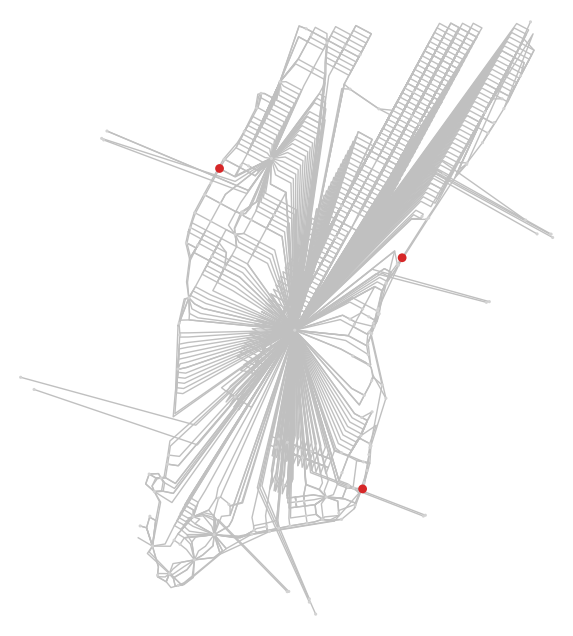

In [46]:
node_size, node_color = node_colors(G_pruned, escape_nodes, fugitive_start, police_start)
edge_size, edge_color = edge_colors(G_pruned)
ox.plot_graph(G_pruned, 
                    bgcolor="white", node_color=node_color, node_size=node_size, 
                    edge_linewidth=edge_size, edge_color=edge_color,
                    # show=True, save=True, filepath=f'figs/{city}_pruned_{tolerance}.png'
                    show=False
                    )
plt.savefig(f'./figs/{city}_nodesize_{tolerance}.png', dpi=1000)

In [41]:
print(len(G_pruned.nodes), len(node_color), len(G_pruned.edges), len(edge_color))

2222 2222 4746 4746
